<a href="https://www.kaggle.com/code/chandanarprasad/top-100-youtube-channels-analysis?scriptVersionId=97852859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../input/top-youtube-channels-data/Top YouTube Channels Data .csv')

print(df.shape)
df.head()

(100, 7)


,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013


In [2]:
df = df.rename(columns=lambda x: x.strip())
df.category = df.category.str.strip()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   youtuber     100 non-null    object 
 2   subscribers  100 non-null    int64  
 3   video views  100 non-null    object 
 4   video count  95 non-null     float64
 5   category     100 non-null    object 
 6   started      100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [4]:
df.isna().sum().any()

True

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         95 non-null     int64  
 1   youtuber     95 non-null     object 
 2   subscribers  95 non-null     int64  
 3   video views  95 non-null     object 
 4   video count  95 non-null     float64
 5   category     95 non-null     object 
 6   started      95 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.9+ KB


In [7]:
df['video count'] = df['video count'].astype(int)
df['video views'] = df['video views'].str.replace(',','')
df['video views'] = df['video views'].astype('int64')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,95.0,5.202105e+01,2.824625e+01,1.000000e+00,2.850000e+01,5.200000e+01,7.550000e+01,1.000000e+02
subscribers,95.0,5.123263e+07,2.640947e+07,3.220000e+07,3.620000e+07,4.270000e+07,5.545000e+07,2.130000e+08
video views,95.0,2.767061e+10,2.628749e+10,2.647950e+09,1.456406e+10,2.088142e+10,2.814759e+10,1.880739e+11
video count,95.0,1.584722e+04,4.095520e+04,4.500000e+01,3.935000e+02,1.139000e+03,4.986000e+03,2.093510e+05
started,95.0,2.010663e+03,5.612696e+00,1.970000e+03,2.007000e+03,2.011000e+03,2.014000e+03,2.018000e+03


In [9]:
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

<AxesSubplot:>

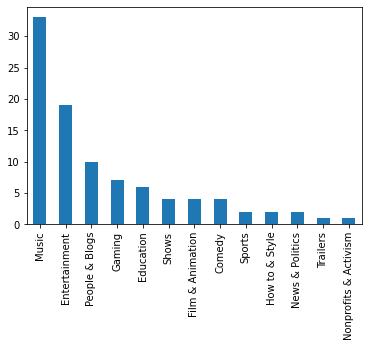

In [10]:
# Category-wise distribution
df['category'].value_counts().plot(kind='bar')

In [11]:
# Top 10 of 100 
df.youtuber.head(10)

0                       T-Series 
2     Cocomelon - Nursery Rhymes 
3                      SET India 
5                      PewDiePie 
6                        MrBeast 
7                Kids Diana Show 
9                     Like Nastya
10                           WWE 
11             Zee Music Company 
12                 Vlad and Niki 
Name: youtuber, dtype: object

In [12]:
# Bottom 10 of top 100
df.youtuber.tail(10)

90                       J Balvin 
91             Masha and The Bear 
92                      VEGETTA777
93                        YouTube 
94    Goldmines Gaane Sune Ansune 
95                     Markiplier 
96                Like Nastya ESP 
97                   Ryan's World 
98                       ABP News 
99             Desi Music Factory 
Name: youtuber, dtype: object

In [13]:
df.corr()

,rank,subscribers,video views,video count,started
rank,1.000000,-0.751911,-0.488529,0.062303,0.009507
subscribers,-0.751911,1.000000,0.819504,0.001657,-0.065214
video views,-0.488529,0.819504,1.000000,0.088724,-0.077555
video count,0.062303,0.001657,0.088724,1.000000,-0.088179
started,0.009507,-0.065214,-0.077555,-0.088179,1.000000


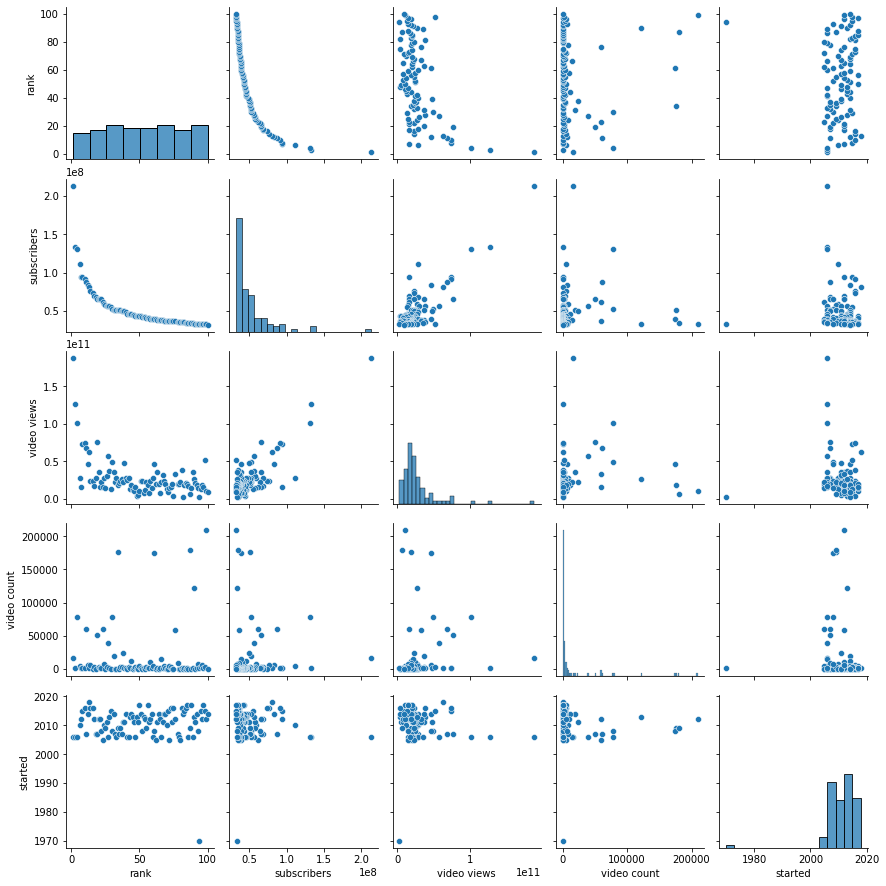

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
#Top 10 youtubers based on video count
df.sort_values(by=['video count'],ascending=False).head(10)['youtuber']

98                 ABP News 
86               TEDx Talks 
33                  Aaj Tak 
60    ABS-CBN Entertainment 
89                     one31
29                Colors TV 
3                 SET India 
10                      WWE 
22                   Zee TV 
75        WorkpointOfficial 
Name: youtuber, dtype: object

Text(0.5, 1.0, 'Top 10 youtubers based on video count')

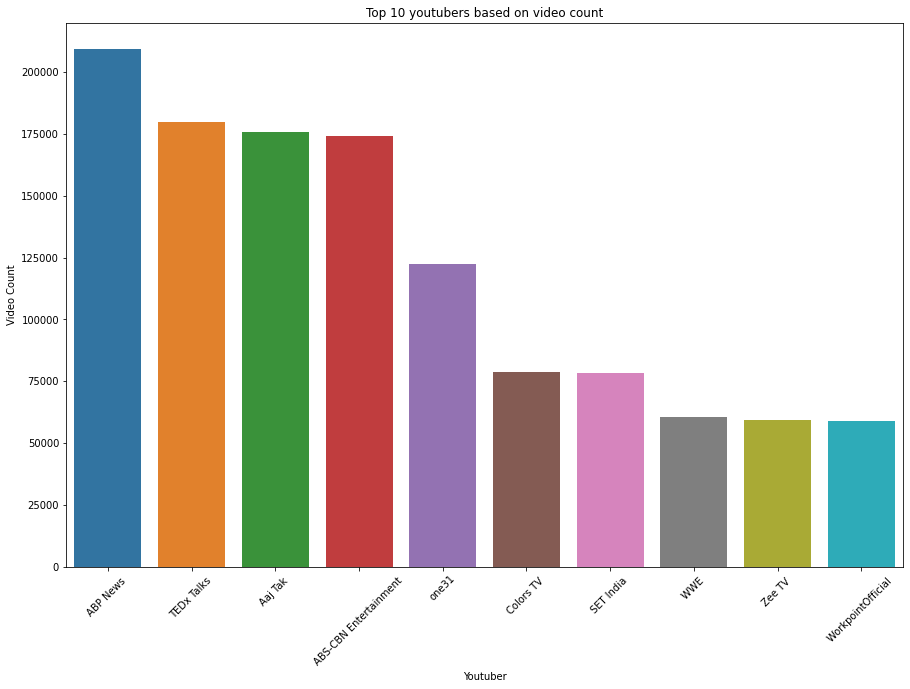

In [16]:
new_index = (df.sort_values(by=['video count'],ascending=False).head(10)).index.values
sorted_data = df.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['youtuber'], y=sorted_data['video count'])
plt.xticks(rotation= 45)
plt.xlabel('Youtuber')
plt.ylabel('Video Count')
plt.title('Top 10 youtubers based on video count')

In [17]:
#Top 10 youtubers based on video views
df.sort_values(by=['video views'],ascending=False).head(10)['youtuber']

0                       T-Series 
2     Cocomelon - Nursery Rhymes 
3                      SET India 
18                      Sony SAB 
9                     Like Nastya
7                Kids Diana Show 
10                           WWE 
12                 Vlad and Niki 
26                    Movieclips 
97                  Ryan's World 
Name: youtuber, dtype: object

Text(0.5, 1.0, 'Top 10 youtubers with video views')

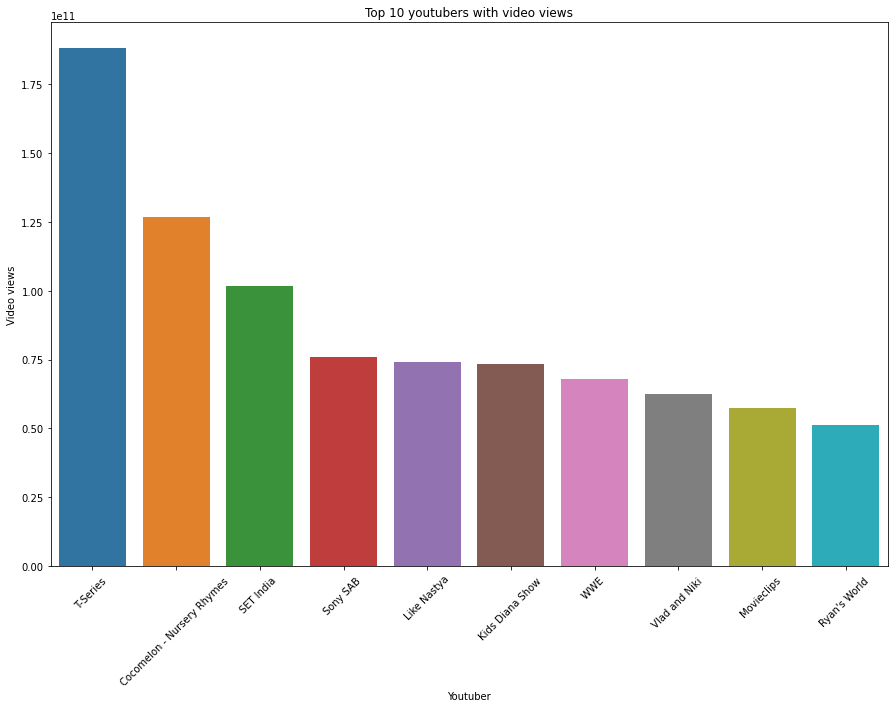

In [18]:
new_index = (df.sort_values(by=['video views'],ascending=False).head(10)).index.values
sorted_data = df.reindex(new_index)
sorted_data

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['youtuber'], y=sorted_data['video views'])
plt.xticks(rotation= 45)
plt.xlabel('Youtuber')
plt.ylabel('Video views')
plt.title('Top 10 youtubers with video views')

In [19]:
#Top 10 youtubers based on subscribers
df.sort_values(by=['subscribers'],ascending=False).head(10)['youtuber']

0                       T-Series 
2     Cocomelon - Nursery Rhymes 
3                      SET India 
5                      PewDiePie 
6                        MrBeast 
7                Kids Diana Show 
9                     Like Nastya
10                           WWE 
11             Zee Music Company 
12                 Vlad and Niki 
Name: youtuber, dtype: object